## Part 1 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import random

### Task A: Network Construction

In [3]:
df=pd.read_csv("data/INTERWIKI_CONFLICT.csv")
df.head()

,thread_subject,username,page_name
0,November 2012,Stryn,WikidataInterwikiconflictsArchive201211.json
1,November 2012,Zanka,WikidataInterwikiconflictsArchive201211.json
2,November 2012,ValterVB,WikidataInterwikiconflictsArchive201211.json
3,November 2012,Infovarius,WikidataInterwikiconflictsArchive201211.json
4,November 2012,Zolo,WikidataInterwikiconflictsArchive201211.json


In [39]:
df2=pd.read_csv("data/PROPERTY_PROPOSAL.csv")
df2.head()

,thread_subject,username,page_name
0,08euroRupersonID,ديفيد عادل وهبة خليل 2,WikidataPropertyproposal08euroRupersonID.json
1,08euroRupersonID,Pintoch,WikidataPropertyproposal08euroRupersonID.json
2,100bombardirovpersonID,Сидик из ПТУ,WikidataPropertyproposal100bombardirovpersonID...
3,100bombardirovpersonID,ديفيد عادل وهبة خليل 2,WikidataPropertyproposal100bombardirovpersonID...
4,100bombardirovpersonID,Gabbg82,WikidataPropertyproposal100bombardirovpersonID...


In [41]:
df3=pd.read_csv("data/REQUEST_FOR_DELETION.csv")
df3.head()

,thread_subject,username,page_name
0,[[Q259]],Denny Vrandečić (WMDE),WikidataRequestsfordeletionsArchive20121030.json
1,[[Q292]],Emijrp,WikidataRequestsfordeletionsArchive20121030.json
2,[[Q292]],Vituzzu,WikidataRequestsfordeletionsArchive20121030.json
3,[[Q292]],Denny Vrandečić (WMDE),WikidataRequestsfordeletionsArchive20121030.json
4,[[Q304]],Emijrp,WikidataRequestsfordeletionsArchive20121030.json


In [46]:
G=nx.Graph()
grouped=df.groupby(['page_name','thread_subject'])
for (page, thread), group in grouped:
    users=group['username'].dropna().unique()
    for u1, u2 in combinations(users, 2):
        G.add_edge(u1, u2, page=page, thread=thread)

In [48]:
print("network construction completed(INTERWIKI_CONFLICT)")
print("number of users:",G.number_of_nodes())
print("number of social connections:",G.number_of_edges())
print("Pages:", df['page_name'].nunique())
print("Threads:", df.groupby(['page_name', 'thread_subject']).ngroups)

network construction completed(INTERWIKI_CONFLICT)
number of users: 1564
number of social connections: 3255
Pages: 117
Threads: 3116


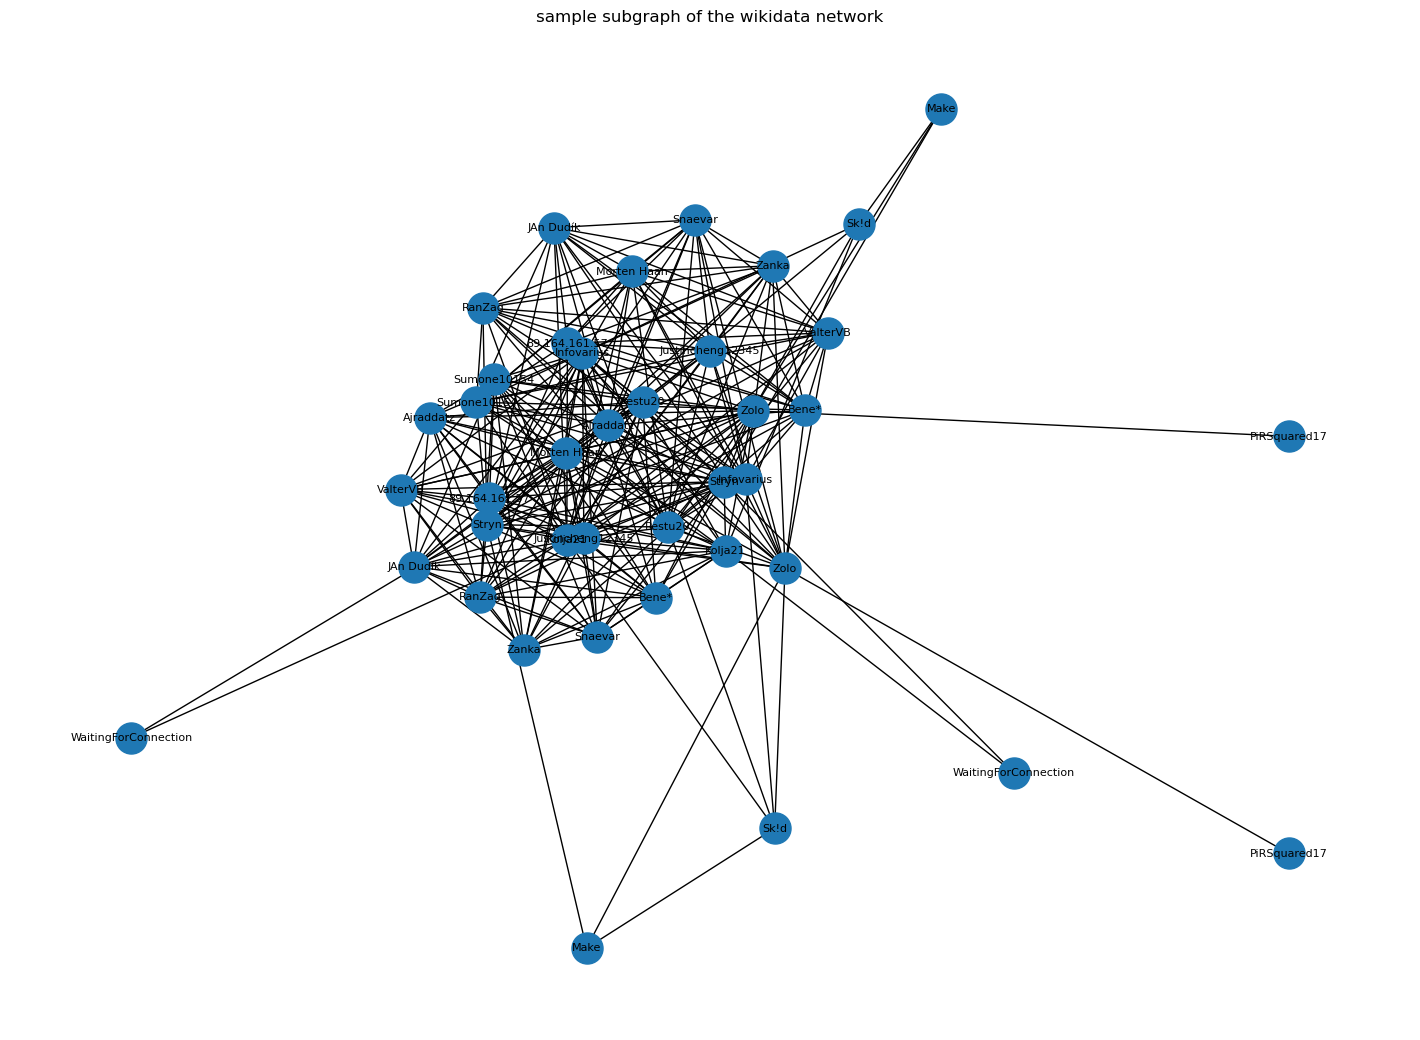

In [10]:
subnodes=list(G.nodes())[:20]
subgraph=G.subgraph(subnodes)
plt.figure(figsize=(14, 10))
nx.draw(subgraph, with_labels=True, node_size=500, font_size=8)
pos=nx.spring_layout(subgraph, seed=42, k=0.8)
nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=8)
plt.title("sample subgraph of the wikidata network")
#plt.savefig("D:\\kings\\network\\coursework\\subgraph.png", dpi=300, bbox_inches='tight')
plt.show()

### Task B: Network Analysis

In [12]:
avg_degree=sum(dict(G.degree()).values()) / G.number_of_nodes()
print("average degree:", avg_degree)
connected_components=nx.number_connected_components(G)
print("number of connected components:", connected_components)

average degree: 4.162404092071611
number of connected components: 42


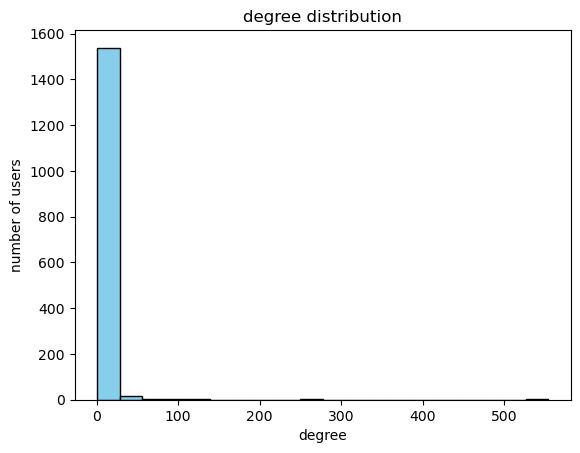

In [15]:
degrees=[d for n, d in G.degree()]
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.title("degree distribution")
plt.xlabel("degree")
plt.ylabel("number of users")
plt.show()

In [17]:
avg_clustering=nx.average_clustering(G)
print("average clustering coefficient:", avg_clustering)
if nx.is_connected(G):
    avg_path_length=nx.average_shortest_path_length(G)
    diameter=nx.diameter(G)
    print("average shortest path length:", avg_path_length)
    print("network diameter:", diameter)
else:
    print("graph is not connected")
    largest_cc=max(nx.connected_components(G), key=len)
    subgraph=G.subgraph(largest_cc)
    #from networkx.algorithms.approximation import average_shortest_path_length as approx_path_len
    #avg_path_length = approx_path_len(subgraph)
    avg_path_length=nx.average_shortest_path_length(subgraph)
    diameter=nx.diameter(subgraph)
    print("average shortest path length (largest component):", avg_path_length)
    print("network diameter (largest component):", diameter)

average clustering coefficient: 0.3515958650142564
graph is not connected
average shortest path length (largest component): 3.124473516980463
network diameter (largest component): 8


In [18]:
n=G.number_of_nodes()
m=G.number_of_edges()
p=(2*m)/(n*(n-1))
random_G=nx.erdos_renyi_graph(n=n, p=p, seed=42)

In [19]:
print("random graph analysis")
rand_clustering=nx.average_clustering(random_G)
print("average clustering coefficient:", rand_clustering)
if nx.is_connected(random_G):
    rand_path_length=nx.average_shortest_path_length(random_G)
    rand_diameter=nx.diameter(random_G)
    print("average shortest path length:", rand_path_length)
    print("network diameter:", rand_diameter)
else:
    print("graph is not connected")
    largest_cc=max(nx.connected_components(random_G), key=len)
    rand_subgraph=random_G.subgraph(largest_cc)
    rand_path_length=nx.average_shortest_path_length(rand_subgraph)
    rand_diameter=nx.diameter(rand_subgraph)
    print("average shortest path length (largest component):", rand_path_length)
    print("network diameter (largest component):", rand_diameter)

random graph analysis
average clustering coefficient: 0.0007500101489871311
graph is not connected
average shortest path length (largest component): 5.295178987746692
network diameter (largest component): 11


In [20]:
random_avg_degree=sum(dict(random_G.degree()).values()) / random_G.number_of_nodes()
print("average degree:", random_avg_degree)
random_connected_components=nx.number_connected_components(random_G)
print("number of connected components:", random_connected_components)

average degree: 4.140664961636829
number of connected components: 25


### Task C: Simulating Epidemic Spread of Controversial Behavior

This section explores how controversial or trolling behavior may spread among users, and how network data can help detect and anticipate this spread.


#### Q1: Has the Behavior Spread to Neighboring Users?
e randomly selected two editors as suspected trolls and identified their immediate neighbors in the networkIWe simulated a case where 40% of these neighbors also became active on the same day, and computed the infection rate.


In [25]:
trolls = random.sample(list(G.nodes()), 2)
print("Suspected troll users:", trolls)

neighbors = set()
for user in trolls:
    neighbors.update(G.neighbors(user))
neighbors.difference_update(trolls)

if neighbors:
    possibly_infected = random.sample(list(neighbors), int(len(neighbors) * 0.4))  
    infection_rate = len(possibly_infected) / len(neighbors)
    print(f"Infection rate among neighbors: {infection_rate:.2f}")
    print("Possibly influenced users:", possibly_infected)
else:
    print("No neighbors to check.")


Suspected troll users: ['Filip nohe', 'Shizhao']
Infection rate among neighbors: 0.00
Possibly influenced users: []


#### Q2: Prioritizing Who to Monitor Next

Using shortest paths and shared neighborsIwe computed a risk score for each user that reflects how likely they are to have been influenced. The top users with highest risk scores were identified as priority targets for further monitoring.


In [28]:
def rank_users_by_risk(G, trolls, top_n=10):
    from collections import defaultdict

    risk_scores = defaultdict(float)
    
    for node in G.nodes():
        if node in trolls:
            continue

        score = 0

        for troll in trolls:
            try:
                # The closer the distance, the higher the score
                dist = nx.shortest_path_length(G, source=troll, target=node)
                score += 1 / dist
            except nx.NetworkXNoPath:
                continue

            # Number of common neighbors
            common = len(list(nx.common_neighbors(G, troll, node)))
            score += common * 0.2  

        risk_scores[node] = score

    ranked = sorted(risk_scores.items(), key=lambda x: x[1], reverse=True)
    return ranked[:top_n]


In [30]:
priority_list = rank_users_by_risk(G, trolls, top_n=10)
print("Priority users to check next:")
for user, score in priority_list:
    print(f"{user}: {score:.2f}")


Priority users to check next:
Akkakk: 1.40
Izno: 1.40
Jura1: 1.40
It Is Me Here: 1.40
Littledogboy: 1.40
Matěj Suchánek: 1.40
GZWDer: 1.40
VIGNERON: 1.40
Sannita: 1.40
Zerabat: 1.40


I visualized the subgraph containing the suspected trolls and the top-ranked high-risk users. Trolls are shown in red, and users prioritized for monitoring are shown in orange. This visualization highlights the local structure around the trolls and helps illustrate how behavior might propagate through direct and close connections.


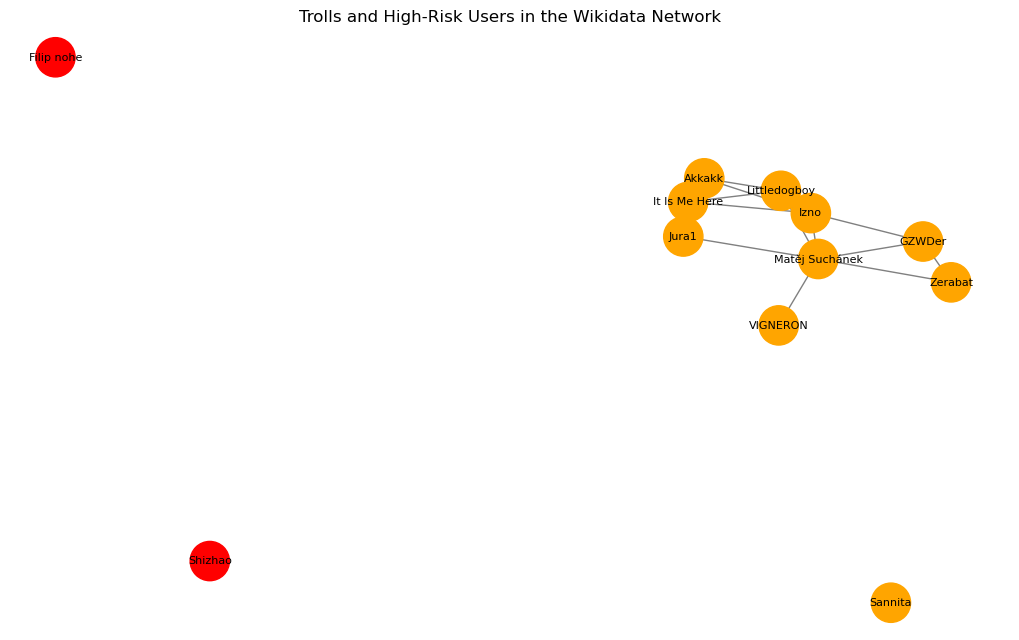

In [37]:
troll_set = set(trolls)
priority_users = [u for u, _ in priority_list]
highlight_set = troll_set.union(priority_users)

subG = G.subgraph(highlight_set)

node_colors = []
for node in subG.nodes():
    if node in trolls:
        node_colors.append('red')       # Trolls: red
    elif node in priority_users:
        node_colors.append('orange')    # High-risk users: orange
    else:
        node_colors.append('skyblue')   # Others: blue

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=8, edge_color='gray')
plt.title("Trolls and High-Risk Users in the Wikidata Network")
plt.show()


## 2.4 Comparing Networks and Social Issues

In this section, I looked back at the three networks I constructed — `REQUEST_FOR_DELETION`, `PROPERTY_PROPOSAL`, and `INTERWIKI_CONFLICT` — and tried to reflect on how their differences affect the way we interpret them. Even though all of them come from the same platform (Wikidata Talk pages), they vary a lot in terms of structure and behavior.

### Differences across the three networks

From the earlier analysis, the three networks clearly differ in size, density, and how users interact. `REQUEST_FOR_DELETION` had the most users and threads, but its connections were more spread out — so the average degree was relatively low. On the other hand, `INTERWIKI_CONFLICT` was much smaller but had a higher clustering coefficient, meaning more tightly connected local groups.

### Where they sit in the network spectrum

Based on metrics like average degree, clustering coefficient, and average path length, I’d place `REQUEST_FOR_DELETION` closer to a random network. It’s large, fairly sparse, and less clustered. `INTERWIKI_CONFLICT`, with its higher clustering and shorter paths in the largest component, feels more like a small-world network. `PROPERTY_PROPOSAL` is somewhere in between — not too random, not too structured.

These differences suggest that even when using the same method to build a network (i.e., connecting users who commented in the same thread), the topic or context can influence how editors interact. Some spaces are more clustered and active; others are more diffuse.

### Issues with network quality and interpretation

One thing I noticed is that the way we define edges — just based on shared thread activity — might miss some meaningful social ties. For example, users might reply directly to each other without being in the same thread, or interact across threads in ways we can’t capture here. Also, if users are very active across many threads, they might artificially appear as hubs even if they’re not central to any one discussion.

So even though we’re using the same logic to build each network, there’s still a subjective element in how those edges are interpreted. This could affect how we analyze things like influence or information flow, especially in smaller networks.

